# Midterm Project

Dataset from kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

**Set UP**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Data cleaning and preparation

- Downloading the dataset
- Doing the train/validation/test split

In [2]:
df = pd.read_csv(r"C:\Users\pc\Downloads\archive (10)\heart.csv")

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0,1025.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,149.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,1.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,132.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,56.0,1.0,1.0,130.0,240.0,0.0,1.0,152.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,275.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Display the first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         8
40   1    0   152       223   0    1        181      0      0.0      2      0   3     0         4
              110       167   0    0        114      1      2.0      1      0   3     0         4
41   1    1   120       157   0    1        182      0      0.0      2      0   2     1         4
71   0    0   112       149   0    1        125      0      1.6      1      0   2     1         4
                                                                                               ..
41   0    1   105       198   0    1        168      0      0.0      2      1   2     1         3
40   1    3   140       199   0    1        178      1      1.4      2      0   3     1         3
34   0    1   118       210   0    1        192      0      0.7      2      0   2     1         3
77   1    0   125       3

In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
15     34    0   1       118   210    0        1      192      0      0.7   
31     50    0   1       120   244    0        1      162      0      1.1   
43     46    1   0       120   249    0        0      144      0      0.8   
55     55    1   0       140   217    0        1      111      1      5.6   
61     66    0   2       146   278    0        0      152      0      0.0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
15        2   0     2       1  
31        2

There are 723 duplicate rows n this dataset, and we will drop them so our prediction will not be biased or overfitted.

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(302, 14)

In [12]:
print(df.shape)
print()
print(df.columns)
print()
print(df.dtypes)

(302, 14)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### EDA

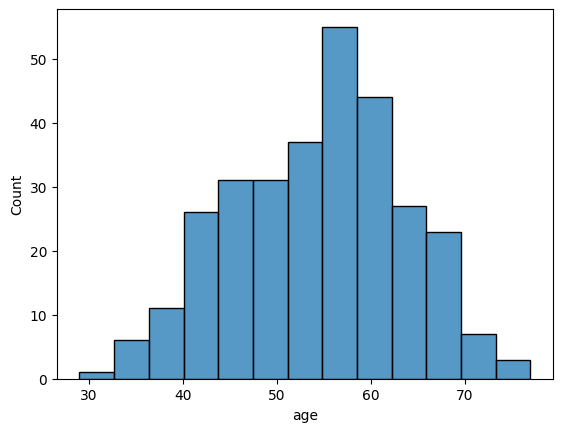

In [24]:
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

sns.histplot(df['age'] )
plt.show()

**Correlation**

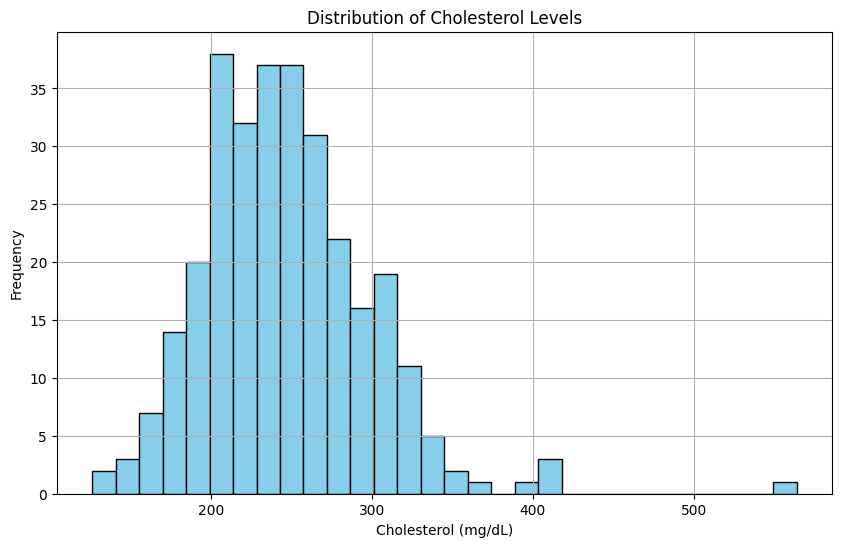

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['chol'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

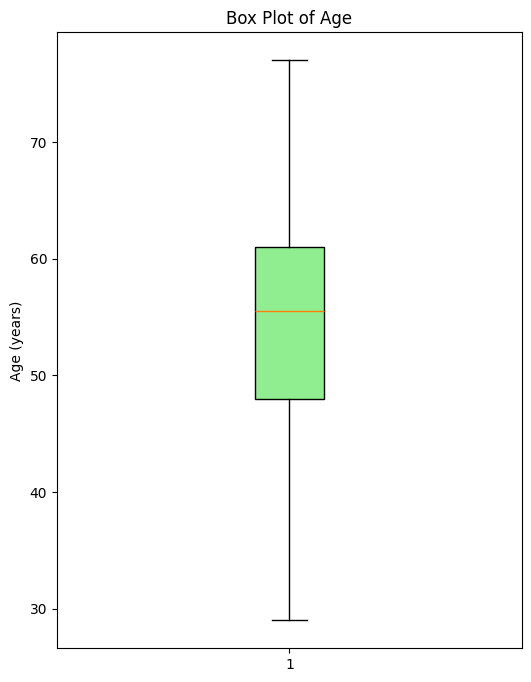

In [16]:
plt.figure(figsize=(6, 8))
plt.boxplot(df['age'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Age')
plt.ylabel('Age (years)')
plt.show()

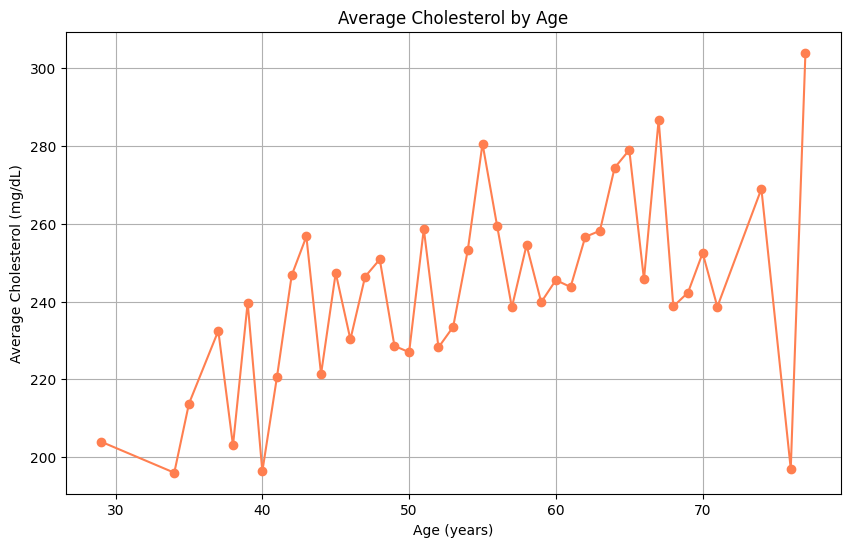

In [27]:
avg_chol_by_age = df.groupby('age')['chol'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_chol_by_age.index, avg_chol_by_age.values, marker='o', linestyle='-', color='coral')
plt.title('Average Cholesterol by Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Cholesterol (mg/dL)')
plt.grid(True)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_18216\4245593519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\pc\AppData\Local\Temp\ipykernel_18216\4245593519.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_chol_by_group = df.groupby('age_group')['chol'].mean()


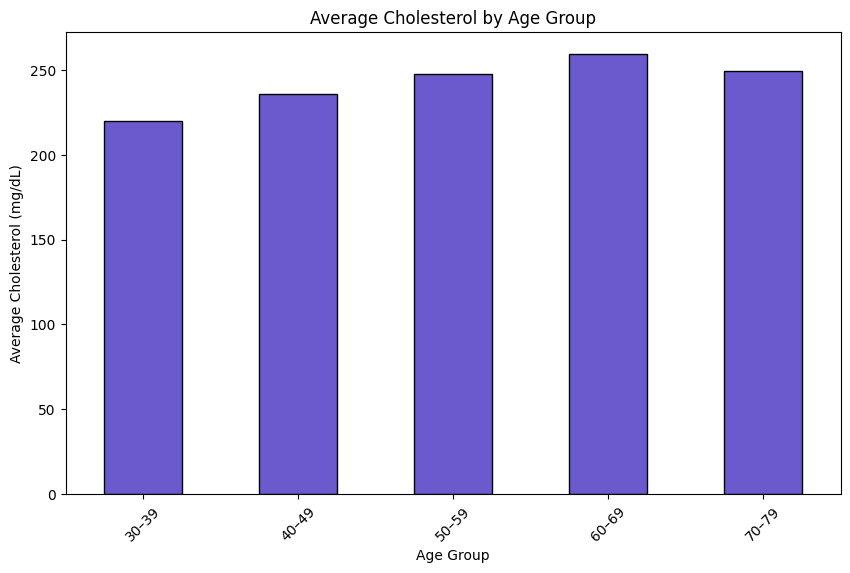

In [28]:
age_bins = [30, 40, 50, 60, 70, 80]
age_labels = ['30–39', '40–49', '50–59', '60–69', '70–79']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
avg_chol_by_group = df.groupby('age_group')['chol'].mean()

plt.figure(figsize=(10, 6))
avg_chol_by_group.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title('Average Cholesterol by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Cholesterol (mg/dL)')
plt.xticks(rotation=45)
plt.show()

In [31]:
target = df["target"].value_counts()
print(target)

target
1    164
0    138
Name: count, dtype: int64


In [35]:
sick = (target[0]/df["target"].count()*100).round(2)
hearty = (target[1]/df["target"].count()*100).round(2)

print("Percentage of patience without heart problems:",hearty)
print()
print("Percentage of patience with heart problems:", sick)

Percentage of patience without heart problems: 54.3

Percentage of patience with heart problems: 45.7


In [67]:
patient = {"target":["hearty","sick"],"percentage":[hearty,sick]}
patient_data = pd.DataFrame(patient)

In [74]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,NaN,0,125,212,0,1,168,0,1.0,2,2,3,NaN,50–59
1,53,NaN,0,140,203,1,0,155,1,3.1,0,0,3,NaN,50–59
2,70,NaN,0,145,174,0,1,125,1,2.6,0,0,3,NaN,70–79
3,61,NaN,0,148,203,0,1,161,0,0.0,2,1,3,NaN,60–69
4,62,NaN,0,138,294,1,1,106,0,1.9,1,3,2,NaN,60–69


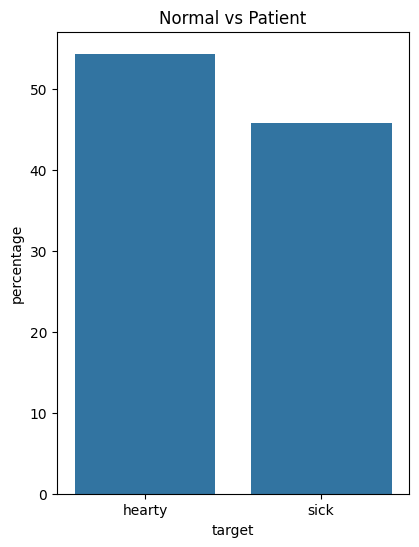

In [76]:
plt.figure(figsize = (10,6))

plt.subplot(1,2,2)
sns.barplot(x="target",y="percentage",data = patient_data )
plt.title("Normal vs Patient")
plt.show()

In [64]:
df["sex"].unique()


array([nan], dtype=object)

1 = Male Patient

0 = Female Patient

In [77]:
# Count the number of male and female patients
sex_counts = df["sex"].value_counts()

# Calculate percentages
male = (sex_counts[1] / df["sex"].count() * 100).round(2)
female = (sex_counts[0] / df["sex"].count() * 100).round(2)

# Print results
print("Percentage of female patients:", female)
print()
print("Percentage of male patients:", male)

C:\Users\pc\AppData\Local\Temp\ipykernel_18216\3519060658.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male = (sex_counts[1] / df["sex"].count() * 100).round(2)


IndexError: index 1 is out of bounds for axis 0 with size 0

In [63]:
# Count of each gender
sex_counts = df["sex"].value_counts()

# Calculate percentages
sex_percentages = (sex_counts / df["sex"].count() * 100).round(2)

# Display results
for gender in sex_counts.index:
    print(f"{gender}: {sex_counts[gender]} patients ({sex_percentages[gender]}%)")

**Distribution of heart disease between male and female**

In [61]:
# Replace target values
df['target'] = df['target'].map({0: 'hearthy', 1: 'sick'})

# Replace sex values
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

C:\Users\pc\AppData\Local\Temp\ipykernel_18216\681482956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map({0: 'hearthy', 1: 'sick'})
C:\Users\pc\AppData\Local\Temp\ipykernel_18216\681482956.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})


In [21]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [22]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [23]:
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1,50–59
1,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0,60–69
2,69,1,3,160,234,1,0,131,0,0.1,1,1,2,1,60–69
3,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0,50–59
4,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0,50–59


Let's define y: